

1) This notebook is containing step by step complete process of applying lipstick on an input face image with given R,G,B input.

2) Task is completed using OpenCv and Dlib.

3) First I am detecting face in image using dlib.get_frontal_face_detector.

4) For deticting lips's landmark i'm using "shape_predictor_68_face_landmarks.dat" file from dlib.

5) using those lip's point generated a contour around lips.

6) Filled that contour with given rgb value.

7) to maintain the skin texture applied transparancy in color with alpha value of 0.5


In [132]:
# importing libs
import dlib
import numpy as np
import cv2
import numpy
%pylab inline
import matplotlib.pyplot as plt
import sys
import os
import glob
print("done")

Populating the interactive namespace from numpy and matplotlib
done


In [133]:
#Inputs
filename = "test7.jpg"
color_code = (128, 0, 0)

Processing file: test7.jpg


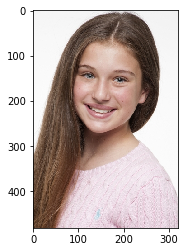

In [134]:
#preparing required files
predictor_loc = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_loc)
print("Processing file:",filename)
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img)

In [135]:
#detecting faces in image
dets = detector(img, 1)
print("Number of faces detected:",(len(dets)))

Number of faces detected: 1


In [136]:
#extracting lips locations in image
shape = predictor(img, dets[0])
xlipspoints = [shape.part(x).x for x in range(48,68)]
ylipspoints = [shape.part(x).y for x in range(48,68)]
print("xlipspoints",xlipspoints)
print("ylipspoints",ylipspoints)
print("length of xlipspoints",len(xlipspoints))
print("length of ylipspoints",len(ylipspoints))
maxx = max(xlipspoints)
minx = min(xlipspoints)
maxy = max(ylipspoints)
miny = min(ylipspoints) 

xlipspoints [113, 126, 139, 148, 157, 171, 187, 170, 154, 144, 134, 123, 118, 137, 146, 156, 182, 155, 145, 136]
ylipspoints [208, 208, 210, 213, 213, 215, 219, 233, 238, 238, 235, 225, 211, 216, 219, 219, 219, 229, 228, 225]
length of xlipspoints 20
length of ylipspoints 20


lips_points [[113, 208], [126, 208], [139, 210], [148, 213], [157, 213], [171, 215], [187, 219], [170, 233], [154, 238], [144, 238], [134, 235], [123, 225], [118, 211], [137, 216], [146, 219], [156, 219], [182, 219], [155, 229], [145, 228], [136, 225]]


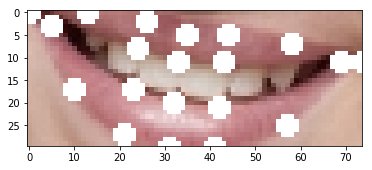

In [137]:
#getting (x,y) points of lip's each landmark
lips_points = []
for pointx,pointy in zip(xlipspoints,ylipspoints):
  lips_points.append([pointx,pointy])
  cv2.circle(img, (pointx,pointy), 1, (255,255,255), thickness=2, lineType=8, shift=0)
cv2.imwrite("lips_point.jpg",img)
crop_image = img[miny:maxy,minx:maxx]
cv2.imwrite("lips.jpg",crop_image)
plt.imshow(crop_image)
print("lips_points",lips_points)

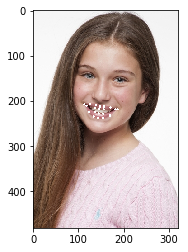

In [138]:
plt.imshow(img)

In [139]:
#building contour and filling lips with input R,G,B
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
contours = [np.array(lips_points, dtype=np.int32)]          
cv2.fillPoly(image, pts =contours, color=color_code)
#plt.imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cv2.imwrite("lips_contours.jpg",image)

True

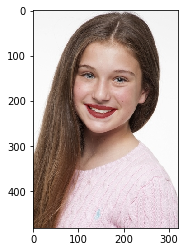

In [140]:
#applying color transparancy for final output
overlay=cv2.imread("lips_contours.jpg")
output = cv2.imread(filename)
alpha = 0.5
cv2.addWeighted(overlay, alpha, output, 1 - alpha,0, output)
cv2.imwrite("output.jpg",output)
output = cv2.cvtColor(output, cv2.COLOR_RGB2BGR)
plt.imshow(output)